Import Packages

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#name of the CSV file you want to read
df_test = pd.read_csv("Train.csv")
df_train = pd.read_csv("Test.csv")
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [5]:
#Load and explore data
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB
None


In [17]:
df_train.shape

(2627, 11)

In [31]:
df_train.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [21]:
# check if dataframe has null values:
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [12]:
df_train.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [7]:
#dropping id as it's irrelevant to my task.
df_train.drop("ID", axis=1,inplace=True)
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [10]:
#percentage of missing values
missingvaluepercent= (df_train.isnull().sum() / len(df_train)) * 100
missingvaluepercent

Gender              0.000000
Ever_Married        1.903312
Age                 0.000000
Graduated           0.913590
Profession          1.446517
Work_Experience    10.239817
Spending_Score      0.000000
Family_Size         4.301485
Var_1               1.218120
Segmentation        0.000000
dtype: float64

In [29]:
# Check the number of duplicate values
df_train.duplicated().sum()

0

In [13]:
#handling missing values with mode for categorical feature
df_train['Ever_Married'].fillna(df_train['Ever_Married'].mode()[0], inplace=True)
df_train['Graduated'].fillna(df_train['Graduated'].mode()[0], inplace=True)
df_train['Profession'].fillna(df_train['Profession'].mode()[0], inplace=True)
df_train['Var_1'].fillna(df_train['Var_1'].mode()[0], inplace=True)

In [14]:
#handling missing values with median for for numerical variables
df_train['Work_Experience'].fillna(df_train['Work_Experience'].median(), inplace = True)
df_train['Family_Size'].fillna(df_train['Family_Size'].median(),inplace = True)

In [15]:
# check if dataframe has null values:
df_train.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

Data Preprocessing

In [16]:
#changing categorical data into numeric data
def change_gender(gender):
    if gender == 'Male':
        return 1 
    else:
        return 0
df_train['Gender'] = df_train['Gender'].apply(change_gender)

In [18]:
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,1,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,0,Yes,69,No,Artist,0.0,Low,1.0,Cat_6,A
3,1,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,0,No,19,No,Marketing,1.0,Low,4.0,Cat_6,A


In [21]:
#changing 'Ever_Married' and 'Graduated' into numeric data
categorical_features = ['Ever_Married', 'Graduated']  
for i in categorical_features[0:2]:
    df_train[i] = df_train[i].apply(lambda x: 1 if x=='Yes' else 0)
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,36,0,Engineer,0.0,Low,1.0,Cat_6,B
1,1,0,37,0,Healthcare,8.0,Average,4.0,Cat_6,A
2,0,0,69,0,Artist,0.0,Low,1.0,Cat_6,A
3,1,0,59,0,Executive,11.0,High,2.0,Cat_6,B
4,0,0,19,0,Marketing,1.0,Low,4.0,Cat_6,A


In [24]:
# Label encoder on Profession feature
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df_train['Profession'])
df_train['Profession'] = y
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,36,0,2,0.0,Low,1.0,Cat_6,B
1,1,0,37,0,5,8.0,Average,4.0,Cat_6,A
2,0,0,69,0,0,0.0,Low,1.0,Cat_6,A
3,1,0,59,0,4,11.0,High,2.0,Cat_6,B
4,0,0,19,0,8,1.0,Low,4.0,Cat_6,A


In [25]:
# label encoder for spending score and Var_1
categorical_features = ['Spending_Score','Var_1']
for i in categorical_features:
    le = LabelEncoder()
    y = le.fit_transform(df_train[i])
    df_train[i] = y
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,36,0,2,0.0,2,1.0,5,B
1,1,0,37,0,5,8.0,0,4.0,5,A
2,0,0,69,0,0,0.0,2,1.0,5,A
3,1,0,59,0,4,11.0,1,2.0,5,B
4,0,0,19,0,8,1.0,2,4.0,5,A


In [4]:
df_train.duplicated().sum()

0

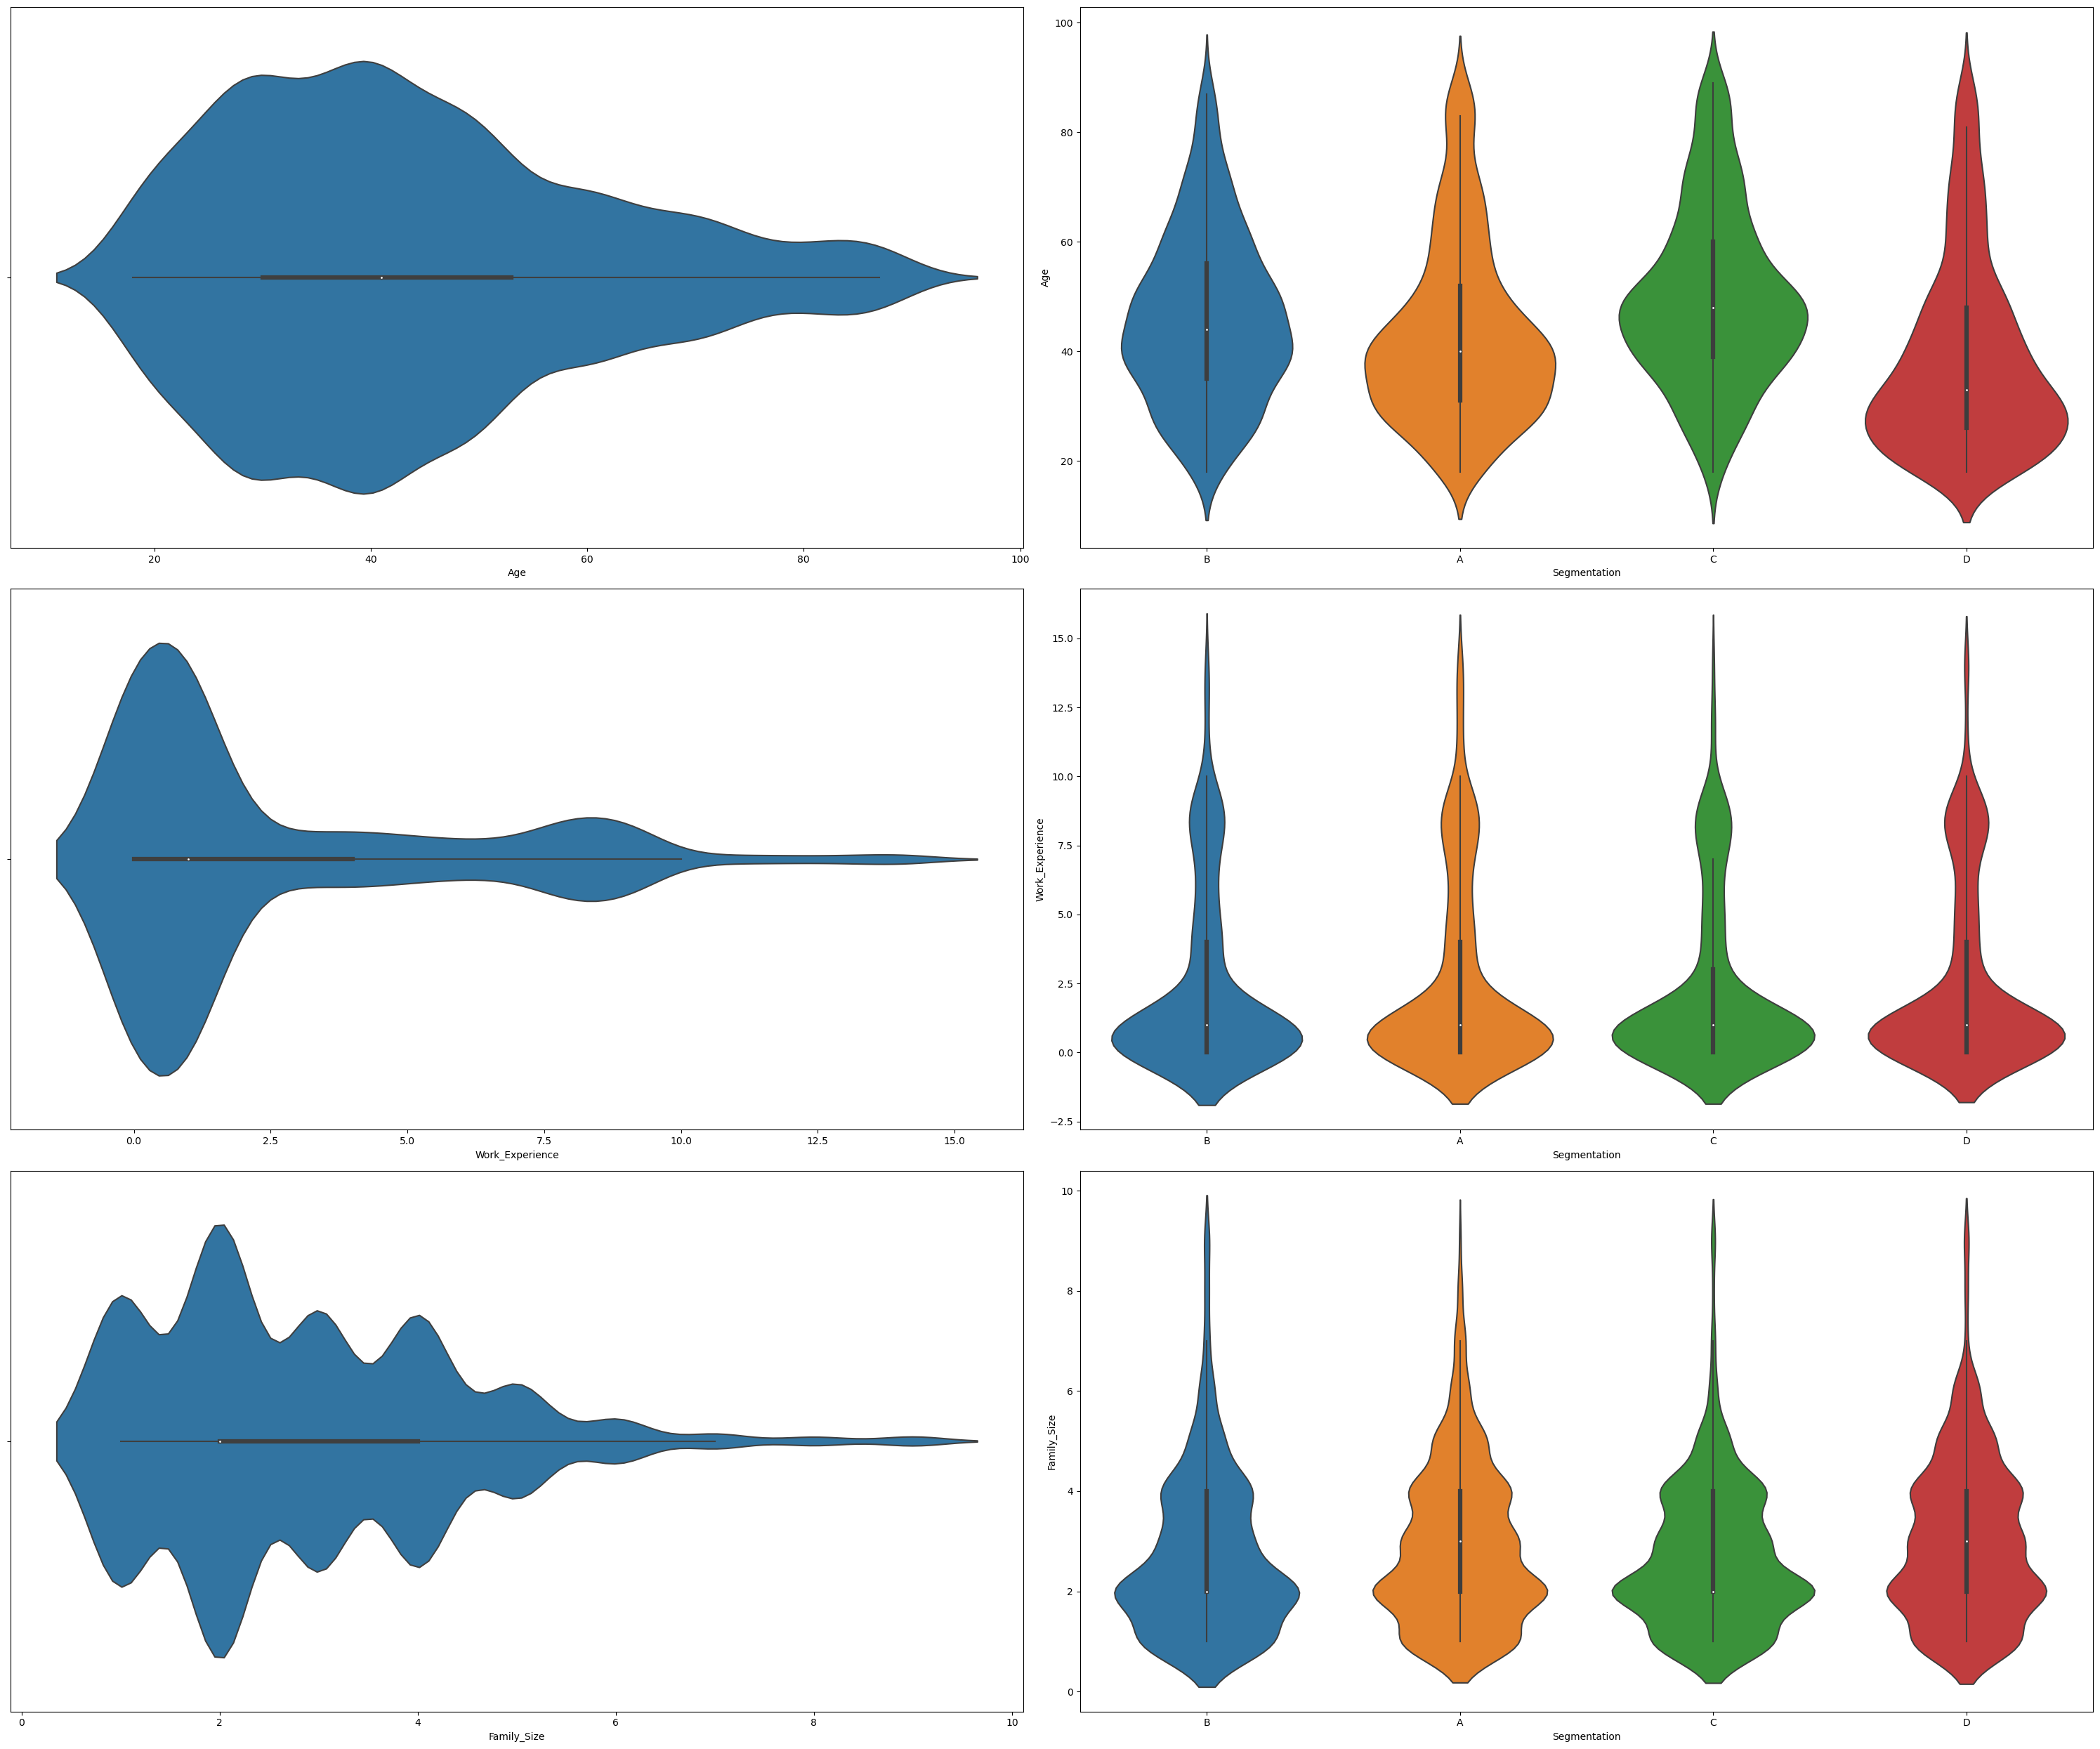

In [5]:
columns = ['Age', 'Work_Experience', 'Family_Size']

fig, axs = plt.subplots(len(columns), 2, figsize=(30, 25))

for i, col in enumerate(columns):
    sns.violinplot(x=df_train[col], ax=axs[i, 0])
    sns.violinplot(x='Segmentation', y=df_train[col], data=df_train, ax=axs[i, 1])

plt.tight_layout()
plt.show()